<a href="https://colab.research.google.com/github/BenTheNetizen/friendship-matchmaking-system/blob/main/matchmaking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [ ]:
print(G_fb.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
target_node = 3000

In [ ]:
def get_overlapping_friends(node, friends_map):
  count = 0
  edges = nx.edges(G_fb, [node])
  for _, friend in edges:
    if friend in friends_map:
      # print(f"friend {friend} in map")
      count += 1

  # print(f"node {node} has {count} mutuals")
  return (node, count)

In [ ]:
print(len(G_fb.nodes))

4039


In [ ]:
from collections import defaultdict

# create hashmap of the friends of the target node
target_node_edges = nx.edges(G_fb, [target_node])
target_node_friends = {}
target_node_friends[target_node] = 1
for _, friend in target_node_edges:
  target_node_friends[friend] = 1

overlapping_friends_list = []

for node in G_fb.nodes:
  if node not in target_node_friends:
    overlapping_friends_list.append(get_overlapping_friends(node, target_node_friends))


result = sorted(overlapping_friends_list, key=lambda x: x[1], reverse=True)
print(result[0:10])





[(3426, 50), (2755, 49), (2782, 49), (2750, 48), (2864, 48), (2974, 44), (2916, 43), (2940, 43), (2994, 43), (3022, 43)]


In [ ]:
spring_pos = nx.spring_layout(G_fb)

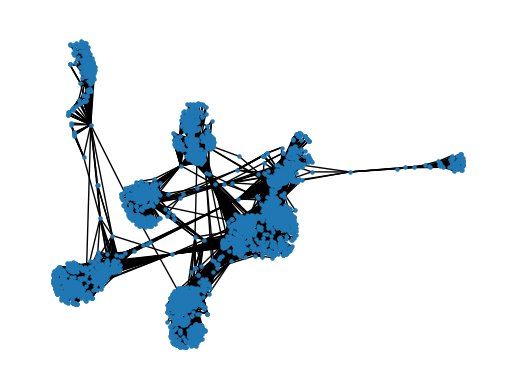

In [ ]:
plt.axis("off")
nx.draw_networkx(G_fb, pos=spring_pos, with_labels=False, node_size=5)